In [1]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Global variables
VEHICLES = 'http://bit.ly/ddl-cars'
AUTOMATIC = "Automatic"
MANUAL = "Manual"

def download_data(url, name, path='data'):
    
    """Download vehicules data or create folder data
       
       Parameters
       ----------
       url: string web location of the dat
       name: string data file name 
       path: sting (optional)
           create new folder name data
       
       Return
       ------
       data: pandas.Dataframe
           vehicule data download
    
    """
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)

    z = zipfile.ZipFile(os.path.join(path, 'vehicles.zip'))
    z.extractall(path)
    
    vehicles = pd.read_csv(os.path.join(path, 'vehicles.csv'))
    return vehicles


vehicles = download_data(VEHICLES, 'vehicles.zip')

In [2]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
select_columns = ['make', 'model', 'year', 'displ', 
                  'cylinders', 'trany', 'drive', 'VClass',
                  'fuelType','barrels08', 'city08', 'highway08', 
                  'comb08', 'co2TailpipeGpm', 'fuelCost08']

vehicles = vehicles[select_columns][vehicles.year <= 2016].drop_duplicates().dropna()

vehicles = vehicles.sort_values(['make', 'model', 'year'])

## Types of Information

There are a few distinct types of information that jump out at us just from taking a quick look at the data set.

* Vehicle attributes information
* Vehicle manufacturer information
* Engine information
* Fuel information (such as fuel efficiency, fuel type, and fuel cost)
* Transmission information
* Drive axle information

Transformation Methods

The first methods we will cover are the transformation methods. Let's take a look at some of my favorite ways to transform data.

* Filtering
* Aggregation/Disaggregation
* Pivoting
* Graph Transformation

In [4]:
vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                    'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                    'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                    'CO2 Emission Grams/Mile','Fuel Cost/Year']

## Thinking About Categorization

* Category Aggregations
* Binning Continuous Variables
* Clustering

In [5]:
def unique_col_values(df):
    """ This function will return the name of the colum
        the number of unique value from each column and
        the column data type
       Parameter
       ---------
       
       df: pandas.DataFrame
       
    """
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


### let's focus on the six categorical columns in our data set.

* Make: 126 unique values
* Model: 3,491 unique values
* Transmission: 43 unique values
* Drivetrain: 7 unique values
* Vehicle Class: 34 unique values
* Fuel Type: 13 unique values


In [6]:
vehicles.loc[vehicles['Transmission'].str.startswith('A'), 
             'Transmission Type'] = AUTOMATIC

vehicles.loc[vehicles['Transmission'].str.startswith('M'),
             'Transmission Type'] = MANUAL

In [7]:
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Transmission Type
19316,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,Automatic
19314,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Automatic


![images](Images/images.PNG)

In [8]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Vehicle Class'].isin(small), 
             'Vehicle Category'] = 'Small Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(midsize), 
             'Vehicle Category'] = 'Midsize Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(large), 
             'Vehicle Category'] = 'Large Cars'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'), 
             'Vehicle Category'] = 'Station Wagons'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'), 
             'Vehicle Category'] = 'Pickup Trucks'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'), 
             'Vehicle Category'] = 'Special Purpose'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'), 
             'Vehicle Category'] = 'Sport Utility'

vehicles.loc[(vehicles['Vehicle Class'].str.lower().str.contains('van')),
             'Vehicle Category'] = 'Vans & Minivans'

In [9]:
vehicles['Model Type'] = (vehicles['Make'] + " " +
                          vehicles['Model'].str.split().str.get(0))

In [10]:
vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

In [11]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

In [12]:
vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline'),'Gas Type'] = 'Regular'

vehicles.loc[vehicles['Fuel Type'] == 'Midgrade',
             'Gas Type'] = 'Midgrade'

vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),
             'Gas Type'] = 'Premium'

vehicles.loc[vehicles['Fuel Type'] == 'Diesel',
             'Gas Type'] = 'Diesel'

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),
             'Gas Type'] = 'Natural'

## Creating Categories from Continuous Variables

In [13]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency',
                         'Moderate Efficiency','High Efficiency',
                         'Very High Efficiency']

vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'],
                                      5, efficiency_categories)

In [14]:
engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine',
                     'Large Engine', 'Very Large Engine']

vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'],
                                  5, engine_categories)

In [15]:
emission_categories = ['Very Low Emissions', 'Low Emissions',
                        'Moderate Emissions','High Emissions',
                        'Very High Emissions']

vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'],
                                 5, emission_categories)

In [16]:
fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost',
                       'Moderate Fuel Cost','High Fuel Cost',
                       'Very High Fuel Cost']

vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'],
                                5, fuelcost_categories)

## Clustering to Create Additional Categories

In [17]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

In [18]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [19]:
cluster_results = kmeans_cluster(vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)

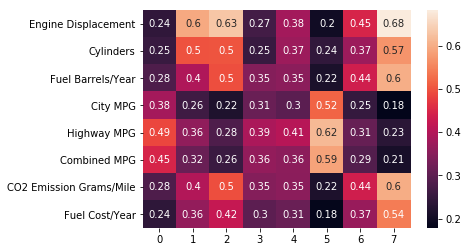

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

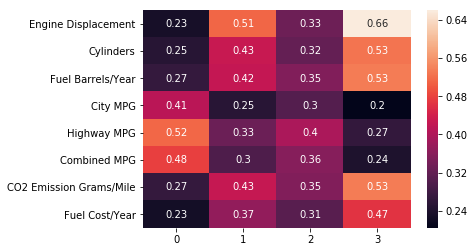

In [21]:
cluster_results = kmeans_cluster(vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [22]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Midsized Balanced'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Large Inefficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Large Moderately Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Small Very Efficient'

vehicles = vehicles.reset_index().drop('index', axis=1)
vehicles['Cluster Name'] = cluster_results['Cluster Name']

## Making Our Data Smaller: Filter + Aggregate

In [23]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped.sort_values(ascending = False, inplace=True)

    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

vehicles_2016 = vehicles[vehicles['Year']==2016]
category_counts = agg_count(vehicles_2016, 'Vehicle Category')

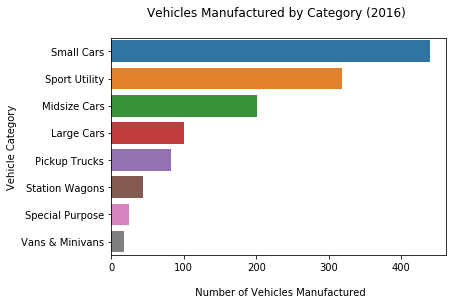

In [24]:
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (2016) \n');

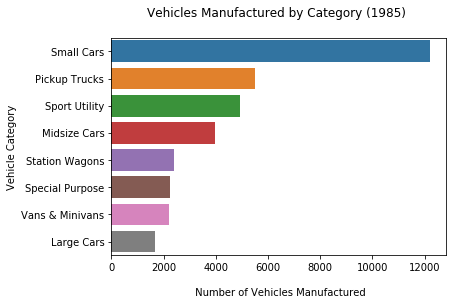

In [25]:
vehicles_1985 = vehicles[vehicles['Year']==1985]
category_counts = agg_count(vehicles, 'Vehicle Category')

ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (1985) \n');

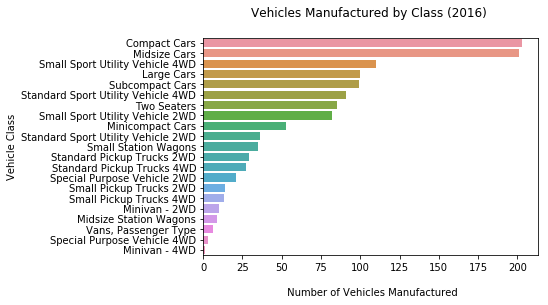

In [26]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')

ax = sns.barplot(data=class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Class (2016) \n');

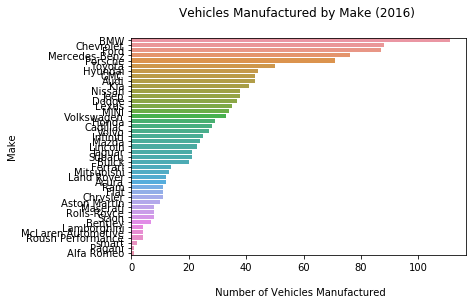

In [27]:
make_counts = agg_count(vehicles_2016, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Make (2016) \n');

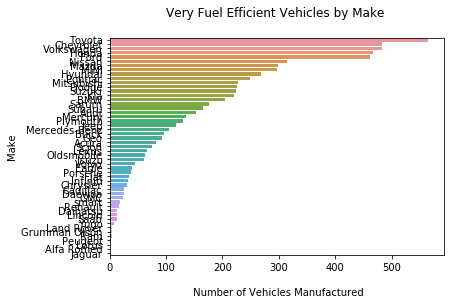

In [28]:
very_efficient = vehicles[vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Very Fuel Efficient Vehicles by Make \n');

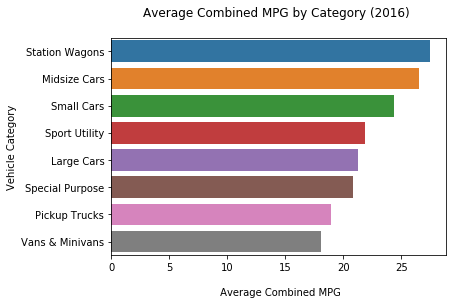

In [29]:
def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    grouped = grouped.sort_values(calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    return grouped

category_avg_mpg = agg_avg(vehicles_2016, 'Vehicle Category', 'Combined MPG')

ax = sns.barplot(data=category_avg_mpg, x='Avg Combined MPG', y='Vehicle Category')
ax.set(xlabel='\n Average Combined MPG')
plt.title('Average Combined MPG by Category (2016) \n');

## Pivoting the Data for More Detail

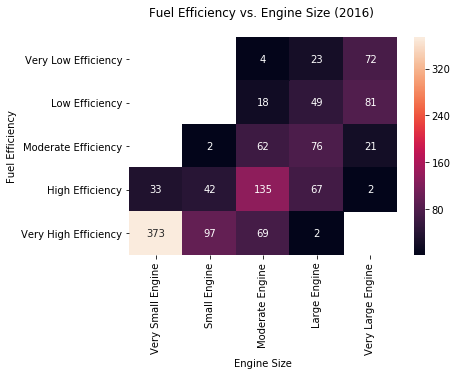

In [30]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency',
                               'Engine Size','Combined MPG')

sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (2016) \n');

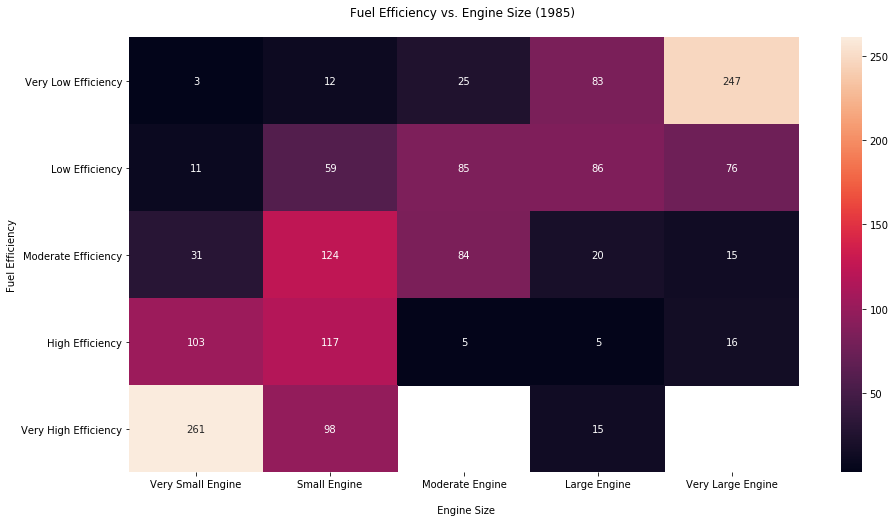

In [31]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency',
                               'Engine Size','Combined MPG')

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (1985) \n');

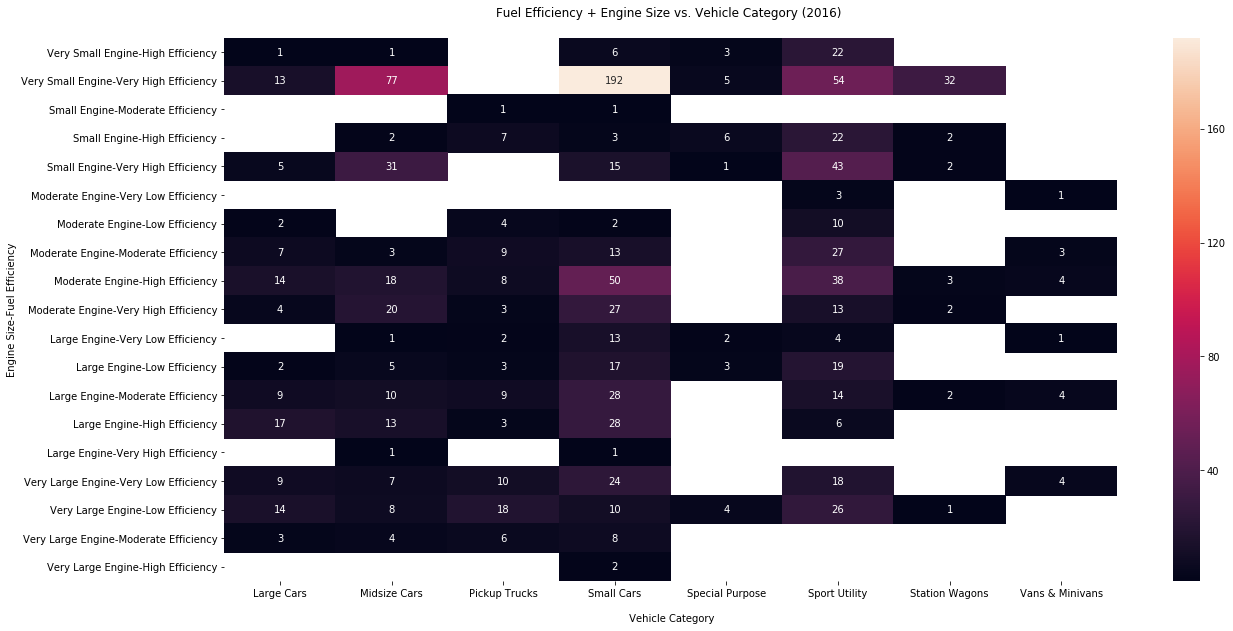

In [32]:
effic_size_category = pivot_count(vehicles_2016,
                                  ['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
plt.title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n');

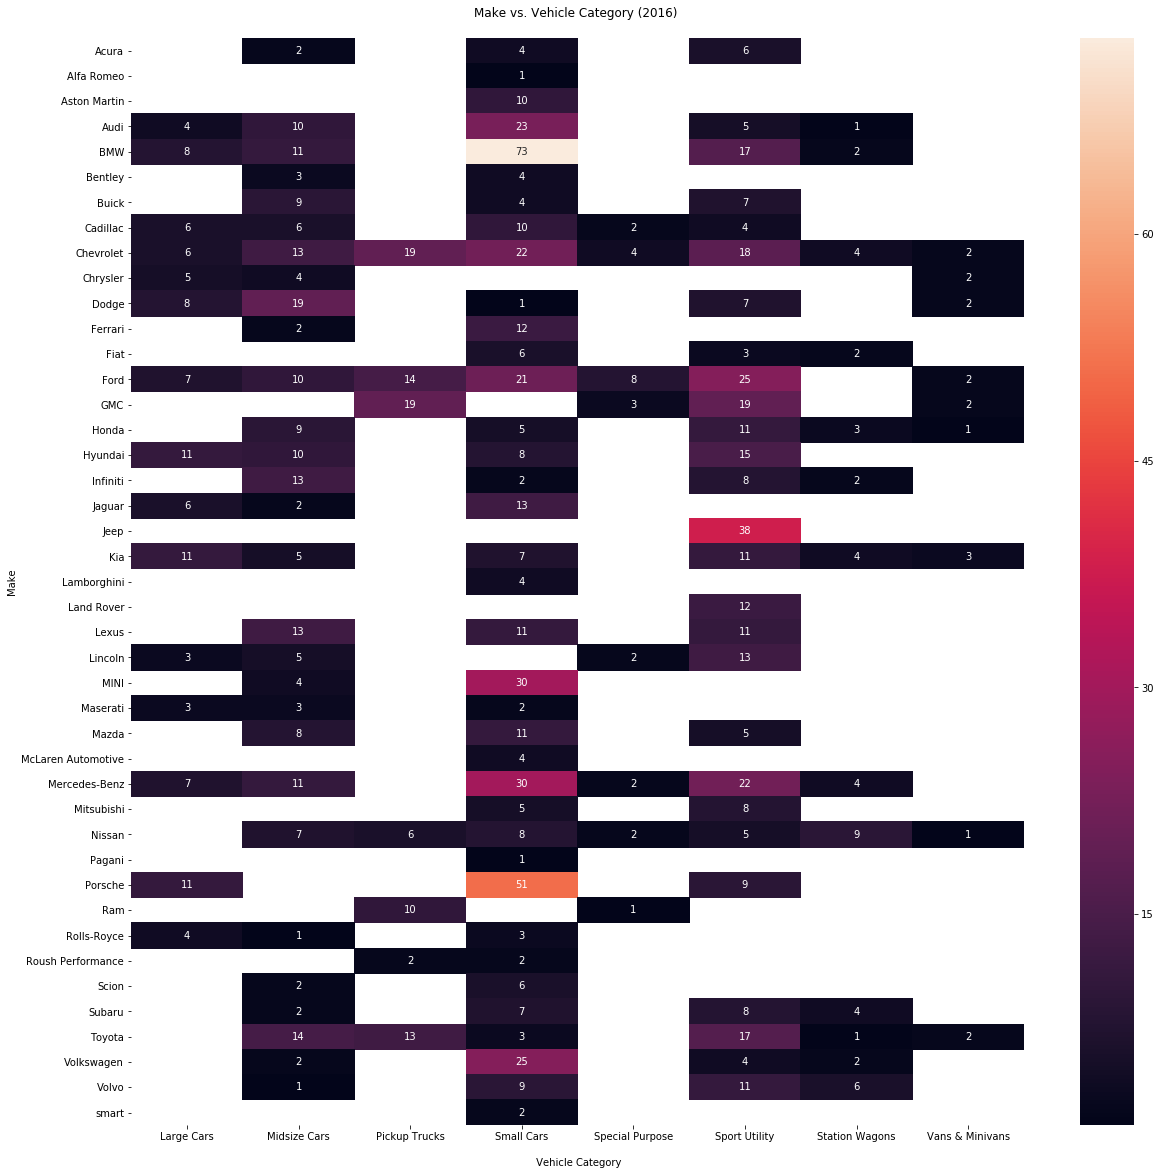

In [33]:
effic_size_pivot = pivot_count(vehicles_2016, 'Make',
                               'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
plt.title('Make vs. Vehicle Category (2016) \n');

## Visualizing Changes Over Time

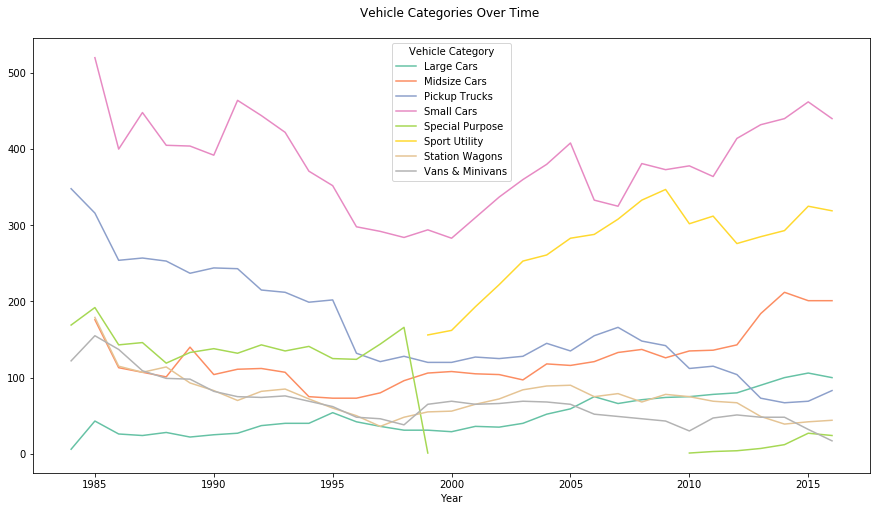

In [34]:
def multi_line(df, x, y):
    ax = df.groupby([x, y]).size().unstack(y).plot(figsize=(15,8), cmap="Set2")
    
multi_line(vehicles, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('Vehicle Categories Over Time \n');

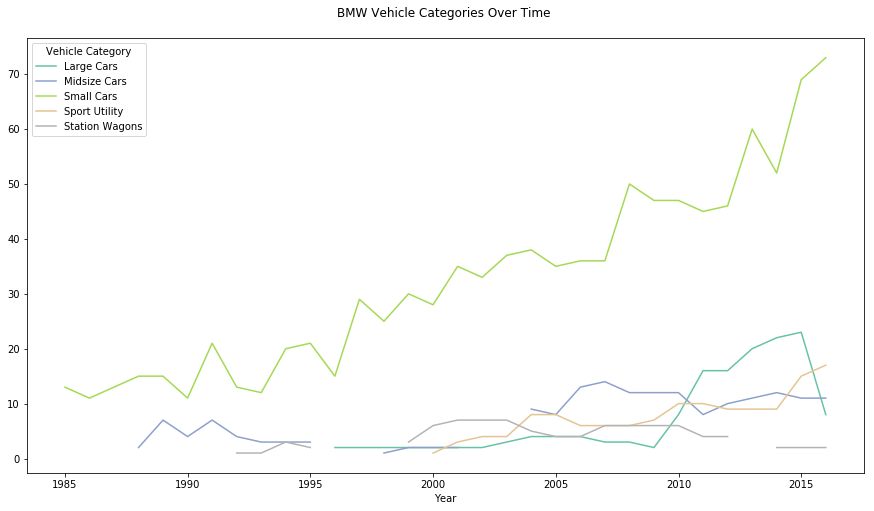

In [37]:
bmw = vehicles[vehicles['Make'] == 'BMW']

multi_line(bmw, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('BMW Vehicle Categories Over Time \n');

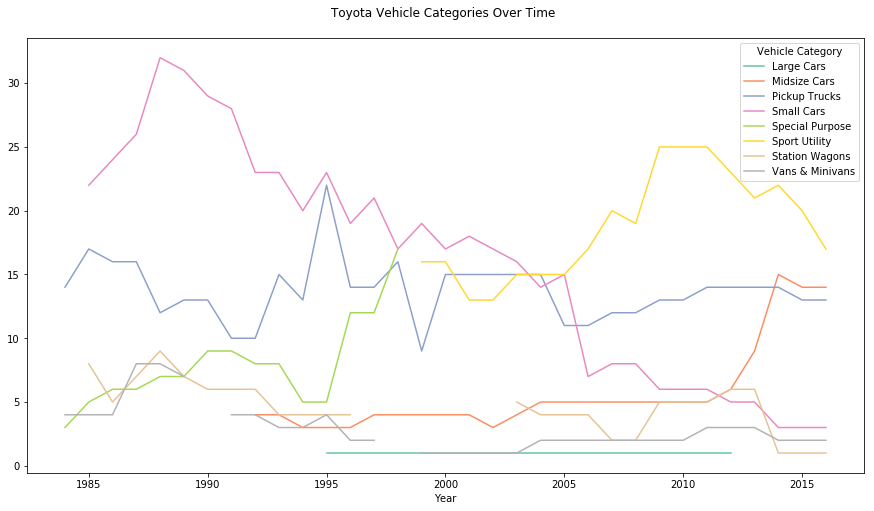

In [38]:
toyota = vehicles[vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('Toyota Vehicle Categories Over Time \n');

## Examining Relationships Between Variables

C:\Users\Georf\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


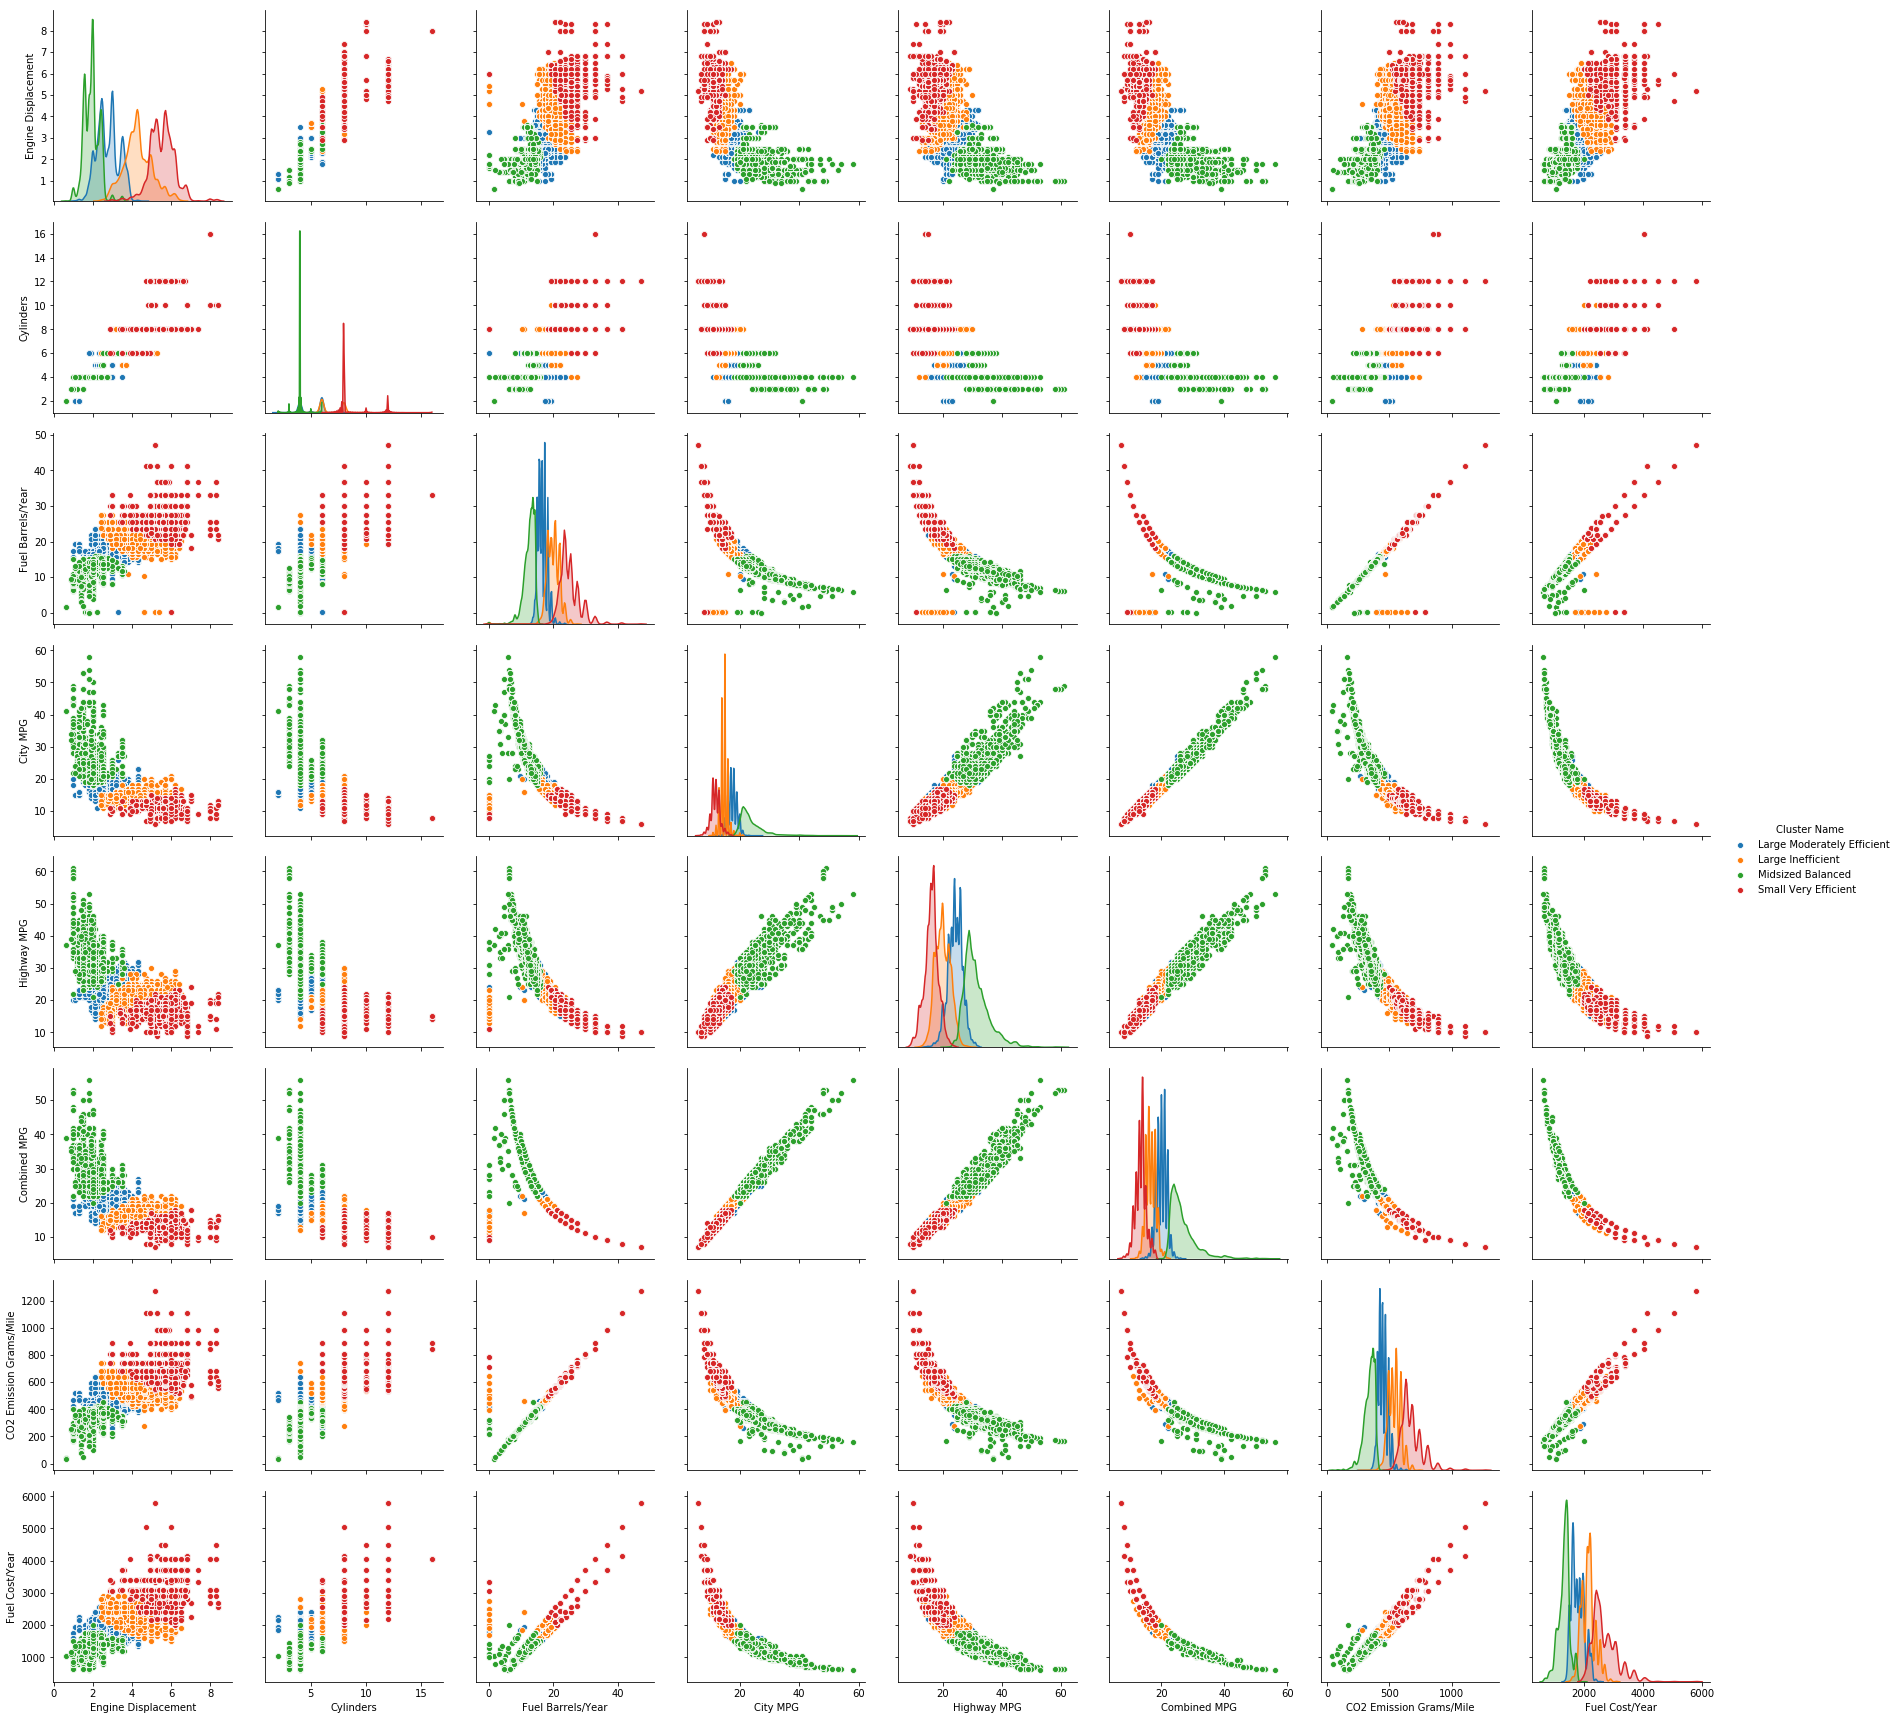

In [39]:
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']

sns.pairplot(vehicles[select_columns], hue='Cluster Name', size=3)

C:\Users\Georf\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


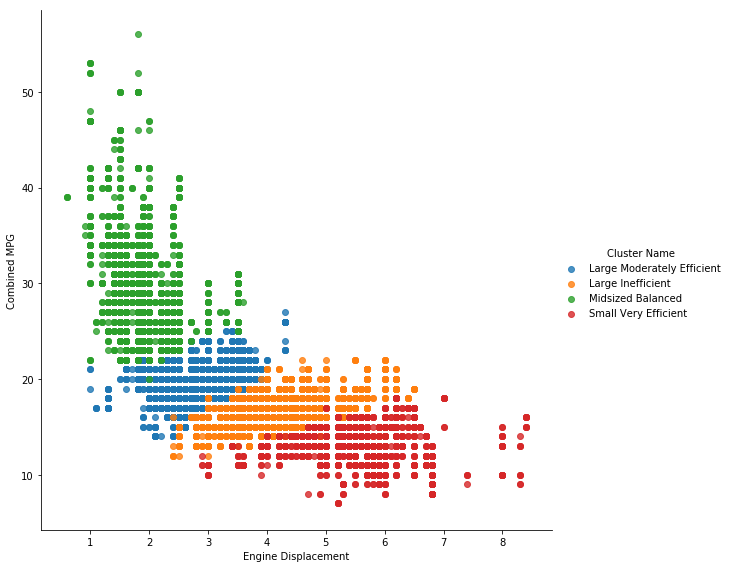

In [40]:
sns.lmplot('Engine Displacement', 'Combined MPG', data=vehicles, 
           hue='Cluster Name', size=8, fit_reg=False)